In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:

# Load the data
satisfaction_df = pd.read_csv("Survey data_Inflight Satisfaction Score.csv")
comments_df = pd.read_csv("Survey data _Customer comments.csv")
pre_order_df = pd.read_csv("Inflight Service_Pre order data.csv")
inventory_df = pd.read_csv("Inflight Service_Inventory data.csv")

# Convert the 'score' column to numeric
satisfaction_df['score'] = pd.to_numeric(satisfaction_df['score'], errors='coerce')


In [22]:

# Merge the inventory dataframe with the satisfaction dataframe to get haul type information
merged_df = inventory_df.merge(satisfaction_df[['flight_number', 'haul_type']], on='flight_number', how='left')

# Satisfaction scores by haul type
satisfaction_by_haul = satisfaction_df.groupby('haul_type')['score'].mean()

# Average leftover and shortage meals by haul type using merged dataframe
merged_df['leftover_meals'] = merged_df['planned_entree_count'] - merged_df['consumed_entree_count']
inventory_by_haul = merged_df.groupby('haul_type').agg({
    'planned_entree_count': 'mean',
    'consumed_entree_count': 'mean',
    'leftover_meals': 'mean'
})

# Pre-order data analysis
total_pre_ordered = pre_order_df['pre_order_qty'].sum()

# Feedback analysis
comments_df['Comment Length'] = comments_df['verbatim_text'].str.len()
average_comment_length = comments_df['Comment Length'].mean()

# Filtering out rows where the comment length is greater than average
lengthy_comments_df = comments_df[comments_df['Comment Length'] > average_comment_length]


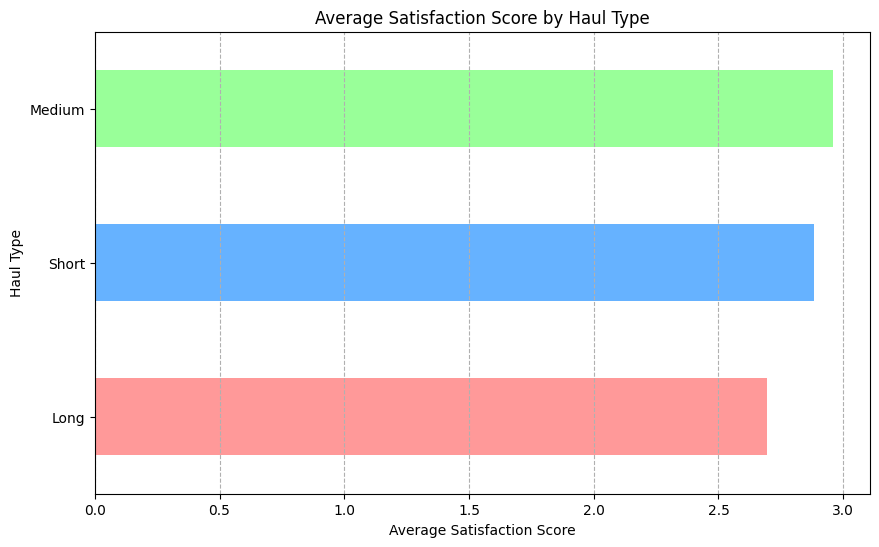

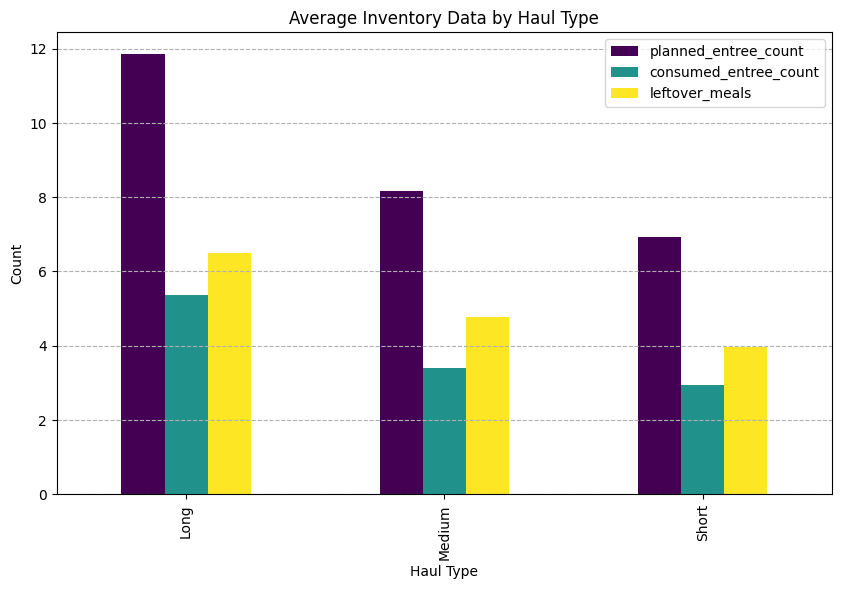

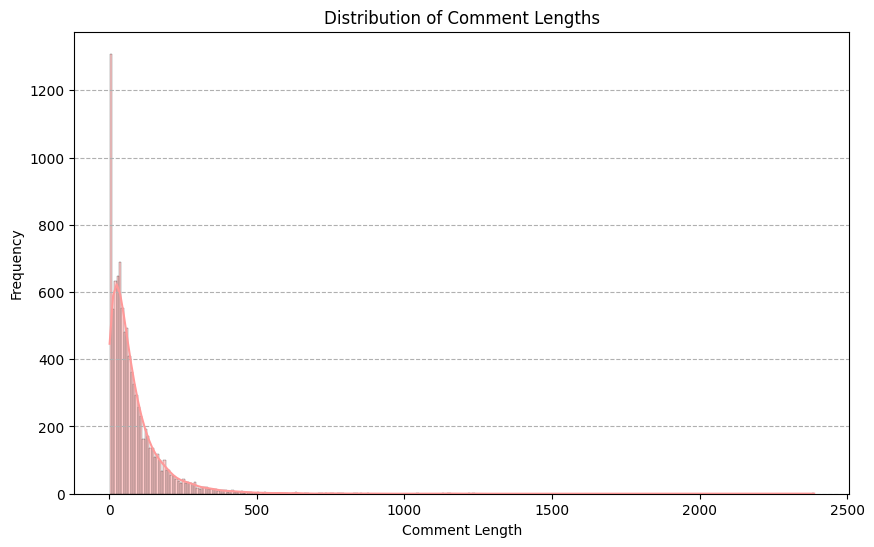

In [24]:

# Satisfaction by Haul Type
plt.figure(figsize=(10, 6))
satisfaction_by_haul.sort_values().plot(kind='barh', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Average Satisfaction Score by Haul Type')
plt.xlabel('Average Satisfaction Score')
plt.ylabel('Haul Type')
plt.grid(axis='x', linestyle='--')
plt.show()

# Inventory Data by Haul Type
inventory_by_haul[['planned_entree_count', 'consumed_entree_count', 'leftover_meals']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Inventory Data by Haul Type')
plt.ylabel('Count')
plt.xlabel('Haul Type')
plt.grid(axis='y', linestyle='--')
plt.show()

# Comments Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(comments_df['Comment Length'], kde=True, color='#FF9999')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()


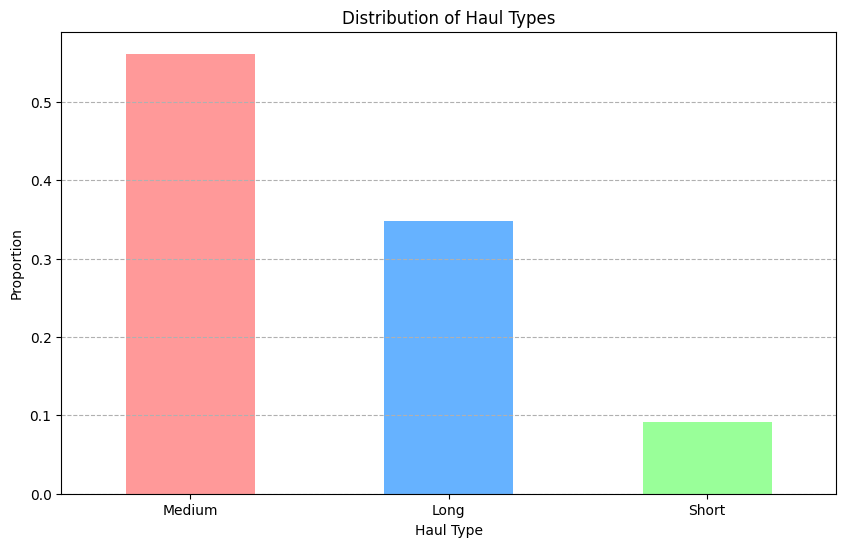

In [25]:

# Analyzing the distribution of haul types
haul_distribution = satisfaction_df['haul_type'].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
haul_distribution.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Distribution of Haul Types')
plt.ylabel('Proportion')
plt.xlabel('Haul Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


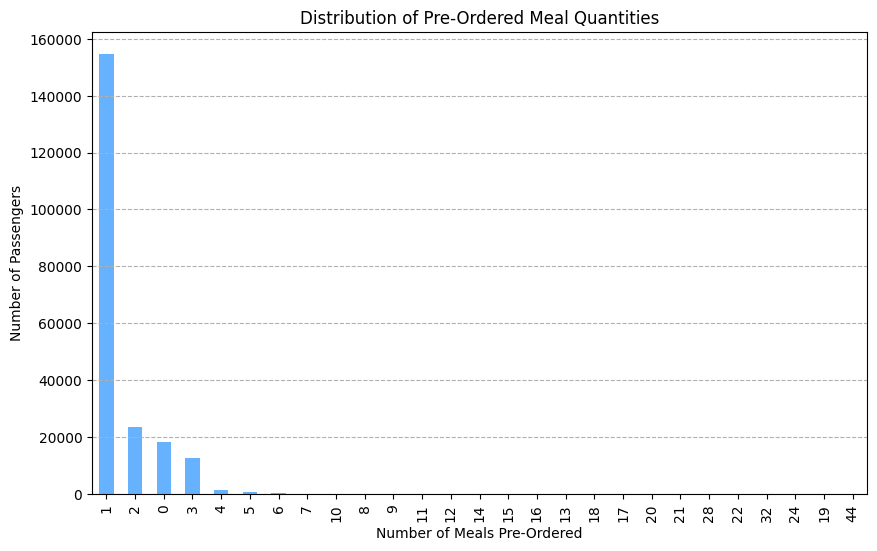

In [28]:
# Pre-Ordering Analysis
pre_order_counts = pre_order_df['pre_order_qty'].value_counts()
plt.figure(figsize=(10, 6))
pre_order_counts.plot(kind='bar', color='#66B2FF')
plt.title('Distribution of Pre-Ordered Meal Quantities')
plt.xlabel('Number of Meals Pre-Ordered')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--')
plt.show()


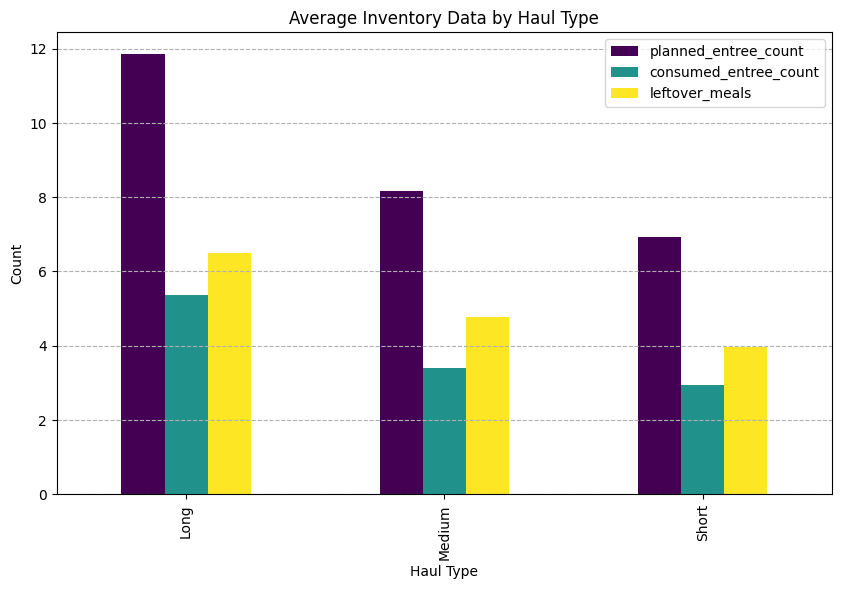

In [29]:
# Merging the inventory data with satisfaction data to obtain haul type information
merged_inventory = pd.merge(inventory_df, satisfaction_df[['flight_number', 'haul_type']], on='flight_number', how='inner')

# Inventory Analysis using the merged data
inventory_by_haul_merged = merged_inventory.groupby('haul_type').agg({
    'planned_entree_count': 'mean',
    'consumed_entree_count': 'mean'
})
inventory_by_haul_merged['leftover_meals'] = inventory_by_haul_merged['planned_entree_count'] - inventory_by_haul_merged['consumed_entree_count']

inventory_by_haul_merged[['planned_entree_count', 'consumed_entree_count', 'leftover_meals']].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Inventory Data by Haul Type')
plt.ylabel('Count')
plt.xlabel('Haul Type')
plt.grid(axis='y', linestyle='--')
plt.show()


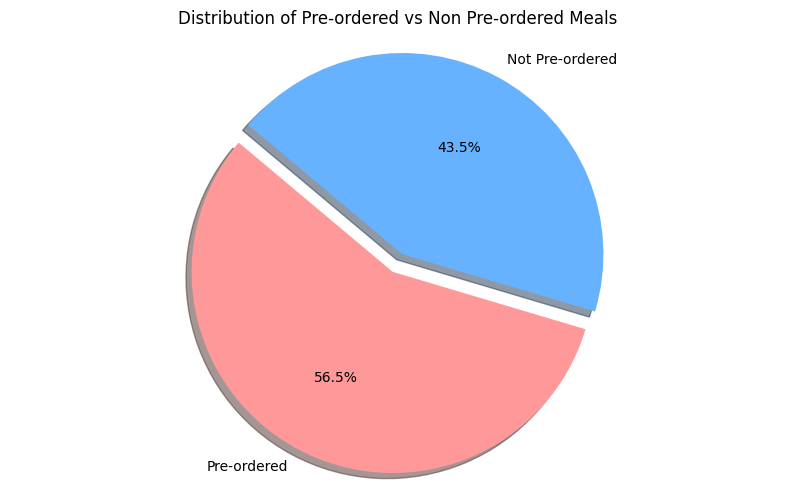

In [36]:

# Pre-ordering analysis
pre_order_total = pre_order_df['pre_order_qty'].sum()
non_pre_order_total = inventory_df['planned_entree_count'].sum() - pre_order_total

# Plotting Pre-order vs Non Pre-order
plt.figure(figsize=(10, 6))
labels = ['Pre-ordered', 'Not Pre-ordered']
sizes = [pre_order_total, non_pre_order_total]
colors = ['#FF9999', '#66B2FF']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Pre-ordered vs Non Pre-ordered Meals')
plt.axis('equal')
plt.show()


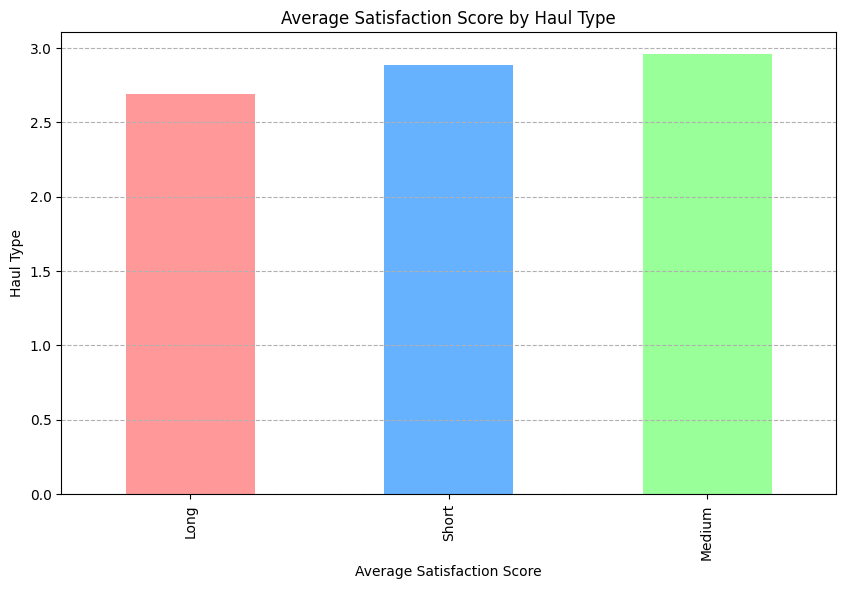

In [38]:
# Haul Analysis
plt.figure(figsize=(10, 6))
satisfaction_by_haul.sort_values().plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Average Satisfaction Score by Haul Type')
plt.xlabel('Average Satisfaction Score')
plt.ylabel('Haul Type')
plt.grid(axis='y', linestyle='--')
plt.show()

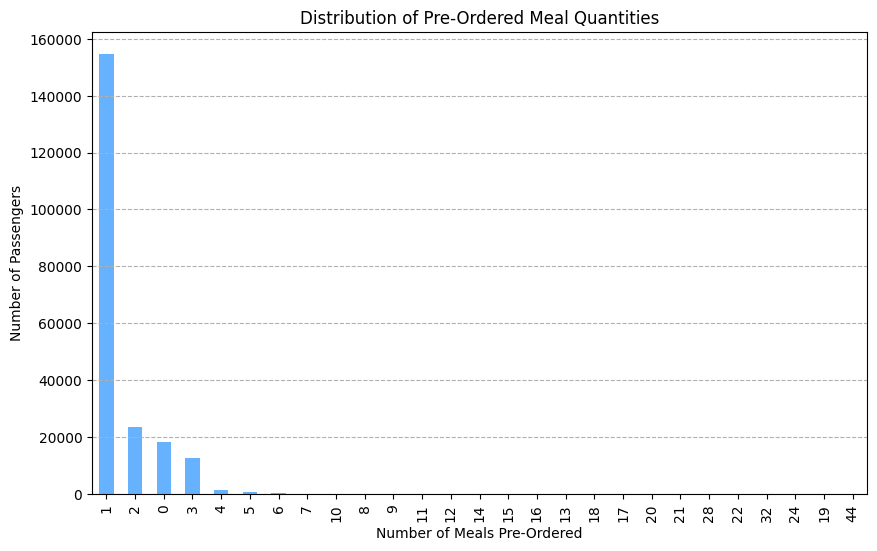

In [39]:
# Pre-Ordering Analysis
pre_order_counts = pre_order_df['pre_order_qty'].value_counts()
plt.figure(figsize=(10, 6))
pre_order_counts.plot(kind='bar', color='#66B2FF')
plt.title('Distribution of Pre-Ordered Meal Quantities')
plt.xlabel('Number of Meals Pre-Ordered')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--')
plt.show()

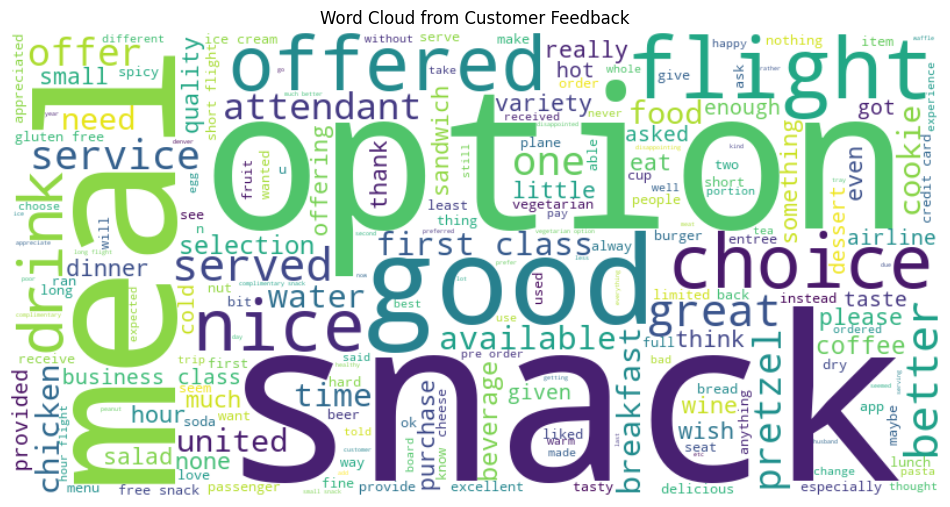

In [41]:
# Feedback-Driven Improvements Analysis
from wordcloud import WordCloud

# Extracting comments from the correct column
comments = comments_df['verbatim_text'].dropna().str.lower().tolist()

# Tokenizing the comments to extract individual words
words = []
for comment in comments:
    words.extend(comment.split())

# Filtering out common words (stopwords) to focus on the most mentioned terms
stopwords = ["the", "to", "and", "of", "in", "was", "for", "on", "with", "my", "a", "it", "is", "i", "that", "this", "not", "but", "were", "as", "had", "flight", "food", "beverage", "they", "we", "you", "are", "there", "no", "have", "would", "from", "at", "an", "me", "ua"]
filtered_words = [word for word in words if word not in stopwords]

# Generating a word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(" ".join(filtered_words))

# Plotting the word cloud
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from Customer Feedback")
plt.show()
